# Testing with Kaggle Dataset

Dataset I Used <a href=https://www.kaggle.com/datasets/shawon10/ckplus/code> CK+<a/>

In [3]:
#import the required modules
import numpy as np
import cv2
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import time

from fer import FER

file_path = "ckplus"

## Testing fer library

In [4]:
def visualize():
    
    moods = [f for f in listdir(file_path)]
    
    sample_images = []
    
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(6, 4), dpi=100)
    
    for idx, mood in enumerate(moods):
        sample = listdir(f"{file_path}/{mood}")[10]
        
        
        img = cv2.imread(f"{file_path}/{mood}/{sample}")
        ax[idx//3, idx%3].imshow(img)
        ax[idx//3, idx%3].set_title(mood)
        
    plt.tight_layout()
    

def read_data(mood):

    path = f"{file_path}/{mood}"
    
    return [f for f in listdir(path) if isfile(join(path, f))]
    

def analyze_fer(mood, images):
    
    n_img = len(images)
    emo_detector = FER(mtcnn=True)
    
    results = []

    for idx, image in enumerate(images):
        img = cv2.imread(f"{file_path}/{mood}/{image}")
        
        dominant_emotion, emotion_score = emo_detector.top_emotion(img)
        
        # if fer couldn't find the face use deepface
        # because it has a feature that we can enforce altough it can't find a face
        if dominant_emotion == None:
            print("using deepface")
            result = DeepFace.analyze(img, actions = ['emotion'], enforce_detection=False, silent=True)
            results.append(result[0]["dominant_emotion"])
           
        else:
            results.append(dominant_emotion)
        
        if idx%100 == 0:
            print(f"progress: {idx}/{n_img}")
        
    return results


def accuracy(mood, results):
    
    n = len(results)
    correct = 0
    
    for emotion in results:
        
        if mood == emotion:
            correct += 1
            
    return correct / n

def report(labels, preds):

    cm = confusion_matrix(test_label,preds)
    cm_labels = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

    # Plot the confusion matrix.
    plt.figure(figsize=(6,5), dpi=120)
    sns.heatmap(cm, annot=True,
                xticklabels=cm_labels,
                yticklabels=cm_labels, fmt="g", cmap="Blues")
    
    plt.title("Confusion Matrix")
    plt.xlabel("Predictions")
    plt.ylabel("Labels")

    print(classification_report(test_label, preds))
    plt.show()

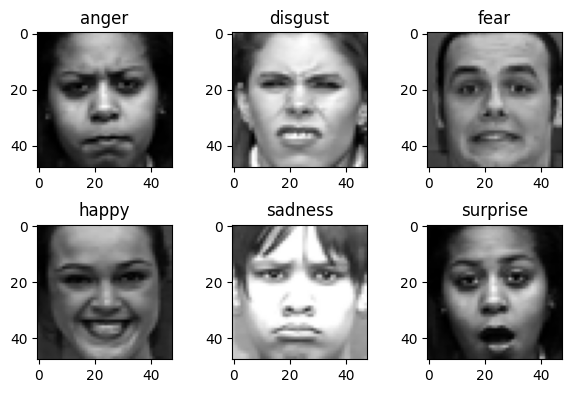

In [5]:
visualize()

### Testing for all moods

In [6]:
moods = [f for f in listdir(file_path)]
mood_mapping = {"anger":"angry", "disgust":"disgust", "fear":"fear",
                      "happy":"happy", "sadness":"sad", "surprise":"surprise"}

fer_scores = {}
test_label = []
fer_preds = []

start = time.time()

for mood in moods:
    images = read_data(mood)
    test_label += [mood_mapping[mood] for _ in range(len(images))]
    
    results = analyze_fer(mood, images)
    fer_preds += results

    score = accuracy(mood_mapping[mood], results)
    fer_scores[mood] = score
    
    print(f"{mood} emotion is done!")
    
took = time.time() - start

progress: 0/135
progress: 100/135
anger emotion is done!
progress: 0/177
progress: 100/177
disgust emotion is done!
progress: 0/75
fear emotion is done!
progress: 0/207
progress: 100/207
progress: 200/207
happy emotion is done!
progress: 0/84
sadness emotion is done!
progress: 0/249
progress: 100/249
progress: 200/249
surprise emotion is done!


### Results

In [7]:
fer_scores

{'anger': 0.5481481481481482,
 'disgust': 0.0,
 'fear': 0.08,
 'happy': 1.0,
 'sadness': 0.5595238095238095,
 'surprise': 0.570281124497992}

In [10]:
took

42.718708992004395

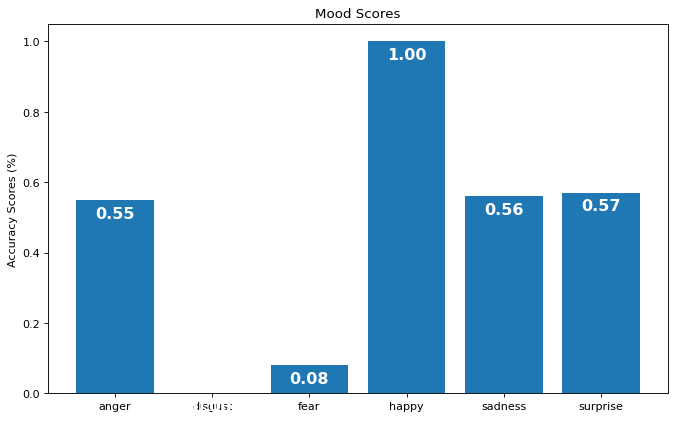

In [14]:
plt.figure(figsize=(10, 6), dpi=80)

plt.bar(fer_scores.keys(), fer_scores.values())
plt.title("Mood Scores")

plt.ylabel("Accuracy Scores (%)")

# plt.show()

for idx, value in enumerate(fer_scores.values()):
    plt.text(idx, value-.05, f"{value:.2f}", fontsize="x-large", ha="center", weight="bold", color="white")

              precision    recall  f1-score   support

       angry       0.27      0.55      0.36       135
     disgust       0.00      0.00      0.00       177
        fear       0.11      0.08      0.09        75
       happy       0.79      1.00      0.88       207
     neutral       0.00      0.00      0.00         0
         sad       0.40      0.56      0.47        84
    surprise       0.97      0.57      0.72       249

    accuracy                           0.51       927
   macro avg       0.36      0.39      0.36       927
weighted avg       0.52      0.51      0.49       927



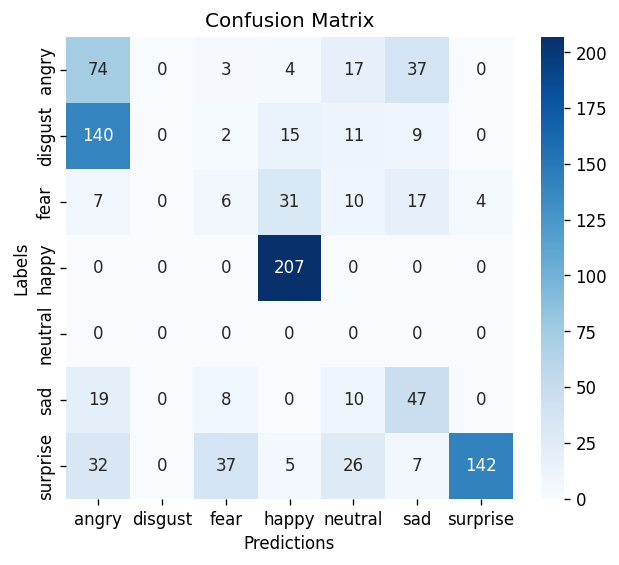

In [29]:
report(test_label, fer_preds)